i:0, Train Loss:263.193481, Test Loss:276.994110
i:200, Train Loss:40.497807, Test Loss:42.631447
i:400, Train Loss:32.322491, Test Loss:33.066147
i:600, Train Loss:28.361248, Test Loss:28.461456
i:800, Train Loss:26.036711, Test Loss:25.877436
i:1000, Train Loss:24.406509, Test Loss:24.218178
i:1200, Train Loss:23.117489, Test Loss:23.040068
i:1400, Train Loss:22.030581, Test Loss:22.150034
i:1600, Train Loss:21.085476, Test Loss:21.455132
i:1800, Train Loss:20.251673, Test Loss:20.904711
i:2000, Train Loss:19.510633, Test Loss:20.467485


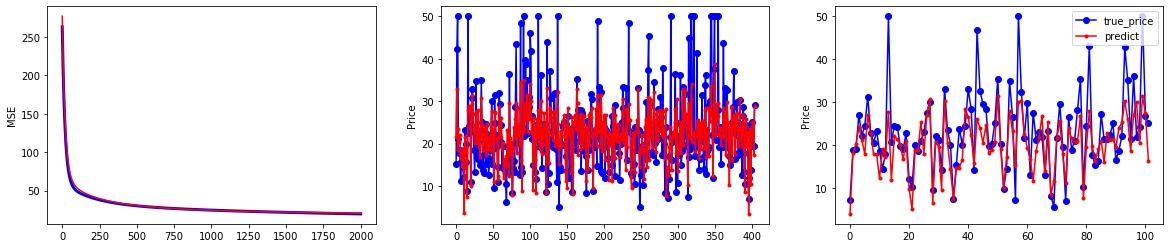

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
boston_housing=tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y) = boston_housing.load_data()

#对数据集所有属性归一化
x_train = (train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
y_train = train_y

x_test = (test_x-test_x.min(axis=0))/(test_x.max(axis=0)-test_x.min(axis=0))
y_test = test_y

num_train = len(train_x)
num_test = len(test_x)

x0_train = np.ones(num_train).reshape(-1,1)
x0_test = np.ones(num_test).reshape(-1,1)

#tf.cast:类型转换函数，tf.concat:堆叠函数
X_train = tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)
X_test = tf.cast(tf.concat([x0_test,x_test],axis=1),tf.float32)

#将房价转换为列向量
Y_train = tf.constant(y_train.reshape(-1,1),tf.float32)
Y_test = tf.constant(y_test.reshape(-1,1),tf.float32)

#设置超参数
learn_rate = 0.007
iter = 2000
display_step = 200

np.random.seed(612)
W = tf.Variable(np.random.randn(14,1),dtype=tf.float32)

#训练模型
mse_train=[]
mse_test = []

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED_train = tf.matmul(X_train,W)
        Loss_train = 0.5*tf.reduce_mean(tf.square(Y_train-PRED_train))
        
        PRED_test = tf.matmul(X_test,W)
        Loss_test = 0.5*tf.reduce_mean(tf.square(Y_test-PRED_test))
        
    mse_train.append(Loss_train)
    mse_test.append(Loss_test)
    
    dL_dW = tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step == 0:
        print("i:%i, Train Loss:%f, Test Loss:%f" %(i,Loss_train,Loss_test))

#可视化
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.ylabel("MSE")
plt.plot(mse_train,color='blue',linewidth=3)
plt.plot(mse_test,color="red",linewidth=1.5)

plt.subplot(132)
plt.plot(y_train,color="blue",marker='o',label='true_price')
plt.plot(PRED_train,color="red",marker='.',label='predict')
plt.ylabel("Price")

plt.subplot(133)
plt.plot(y_test,color="blue",marker='o',label='true_price')
plt.plot(PRED_test,color='red',marker='.',label='predict')
plt.legend()
plt.ylabel("Price")

plt.show()